# Переменные, встречающиеся в n разных папках.

In [1]:
cd ../

/home/ruslan/Documents/course-project-TiMP


Чтобы каждый раз не вводить путь до var.data.log файлов, которые генерируют пути AST для каждой папки, будем собирать их автоматически

In [2]:
import os, fnmatch
def find(pattern, path):
    result = []
    for root, dirs, files in os.walk(path):
        for name in files:
            if fnmatch.fnmatch(name, pattern):
                result.append(os.path.join(root, name))
    return result

files_path = find("*.var.data.log", "dataset/java-small")

In [3]:
def get_folder_name(path:str):
    begin_idx = path.rfind('/') + 1
    end_idx = path.rfind(".var.data.log")
    return path[begin_idx:end_idx]

Для каждого файла необходимо собрать его переменные (первое слово в строке) в отдельную таблицу

In [4]:
import pandas as pd
from collections import Counter

In [5]:
df = []
for file_path in files_path:
    df.append(pd.read_csv(file_path, sep=" ", usecols=[0], names = ["Variable"], header = None))
    df[-1]["Frequency"] = 1
    df[-1] = df[-1].groupby("Variable").sum().reset_index()
    df[-1]["Folders number"] = 1

In [36]:
conc = pd.concat(df)
display(conc)

,Variable,Frequency,Folders number
0,a,46,1
1,aborted,1,1
2,absolute,1,1
3,absolute|file,2,1
4,absolute|path,10,1
...,...,...,...
18904,zs,2,1
18905,zt,2,1
18906,zvec,3,1
18907,zz,4,1


In [37]:
conc = conc.groupby(["Variable"]).sum().reset_index()
conc = conc[conc["Frequency"] > 100]
conc = conc[conc["Folders number"] > 2]
conc.to_csv("freq.csv")
display(conc)

,Variable,Frequency,Folders number
4,a,2831,11
101,absolute|path,108,8
335,access,205,10
347,accessor,341,5
436,account,139,6
...,...,...,...
133168,xml,453,8
133238,xml|file,160,5
133616,y,2644,11
133645,year,116,8


In [13]:
freqs = conc['Frequency']
words = conc['Variable']

display(words, freqs)

0                   a
2                  ab
3                 abc
6            absolute
7       absolute|path
            ...      
5375                z
5376               ze
5378            zeros
5379              zip
5381         zip|file
Name: Variable, Length: 2130, dtype: object

0       2831
2         19
3         21
6         15
7        108
        ... 
5375     273
5376      15
5378       6
5379      91
5381      61
Name: Frequency, Length: 2130, dtype: int64

In [16]:
cnt = Counter()
for seq, freq in zip(words, freqs):
    cnt.update({seq: freq})
    
LIMIT_WORDS=200
srt = sorted(cnt.items(), key=lambda x: x[1], reverse=True)
srt_labels, srt_freqs = list(map(list, zip(*srt)))
srt_labels = srt_labels[:LIMIT_WORDS] + ['other words']
srt_freqs = srt_freqs[:LIMIT_WORDS] + [sum(srt_freqs[LIMIT_WORDS:])]

['e',
 'i',
 'value',
 'name',
 'group|id',
 'result',
 'start',
 'end',
 'file',
 'element',
 'context',
 'type',
 'project',
 'session',
 'user|id',
 'key',
 'list',
 's',
 'o',
 'request',
 'status',
 'node',
 'path',
 'index',
 'ex',
 'uuid',
 'sql',
 'method',
 'query',
 'count',
 'text',
 'editor',
 't',
 'q',
 'id',
 'response',
 'builder',
 'c',
 'parent',
 'message',
 'args',
 'event',
 'entry',
 'conf',
 'class|name',
 'p',
 'expression',
 'out',
 'offset',
 'x',
 'target',
 'b',
 'description',
 'state',
 'sb',
 'values',
 'model',
 'version',
 'module',
 'in',
 'listener',
 'url',
 'msg',
 'a',
 'obj',
 'field',
 'a|class',
 'info',
 'clazz',
 'child',
 'document',
 'data',
 'root',
 'y',
 'settings',
 'size',
 'expected',
 'pk',
 'source',
 'params',
 'content',
 'array',
 'group',
 'title',
 'descriptor',
 'component',
 'user',
 'map',
 'f',
 'action',
 'factory',
 'n',
 'reader',
 'file|name',
 'length',
 'locale',
 'r',
 'j',
 'attributes',
 'scope',
 'se',
 'operation'

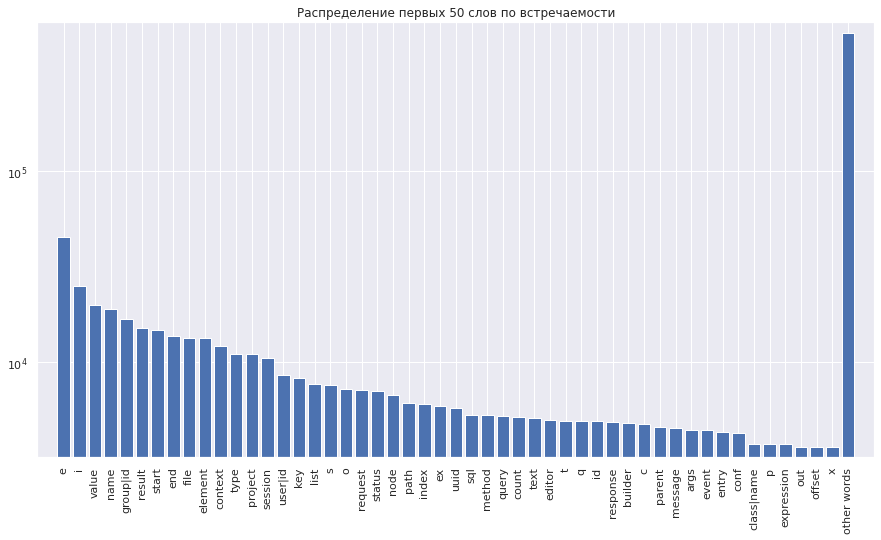

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

plt.figure(figsize=(15, 8))
plt.title(f"Распределение первых {LIMIT_WORDS} слов по встречаемости")
plt.yscale("log")
plt.xticks(rotation='vertical')
plt.margins(0.025)
plt.bar(srt_labels, srt_freqs)
plt.plot();